******

In [1]:
library(tidyverse)
library(readxl)
library(ggplot2)
library(dplyr)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

# Checklist:
## Titles for your final report

### Introduction:
- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and describe the dataset that was used to answer the question

### Methods & Results:
- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
- - loads data from the original source on the web
  - wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
  - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis
  -  creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
  -  performs the data analysis
  -  creates a visualization of the analysis 
- note: all tables and figure should have a figure/table number and a legend

### Discussion:
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

### References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
Make sure to cite the source of your data as well.
- hint - you can use your proposal as a basis for your final report

In [2]:
set.seed(1234)

In [3]:
cereal <- read_excel("data/cereal.xlsx")
cereal_arranged <- cereal |>
    select(name, calories, protein, fat, sodium, fiber, carbo, sugars, potass, rating) |>
    arrange(rating)
cereal_arranged

name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,rating
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cap'n'Crunch,120,1,2,220,0.0,12.0,12,35,18.04285
Cinnamon Toast Crunch,120,1,3,210,0.0,13.0,9,45,19.82357
Honey Graham Ohs,120,1,2,220,1.0,12.0,11,45,21.87129
Count Chocula,110,1,1,180,0.0,12.0,13,65,22.39651
Cocoa Puffs,110,1,1,180,0.0,12.0,13,55,22.73645
Golden Grahams,110,1,1,280,0.0,15.0,9,45,23.80404
Lucky Charms,110,2,1,180,0.0,12.0,12,55,26.73451
Trix,110,1,1,140,0.0,13.0,12,25,27.75330
Fruity Pebbles,110,1,1,135,0.0,13.0,12,25,28.02576


In [4]:
cereal_count <- count(cereal_arranged)
cereal_count

n
<int>
77


In [5]:
# make plots for all 

In [17]:
calories_plot <- cereal_arranged |>
    ggplot(aes(x = calories, y = rating)) +
    geom_point()
protein_plot <- cereal_arranged |>
    ggplot(aes(x = protein, y = rating)) +
    geom_point()
fat_plot <- cereal_arranged |>
    ggplot(aes(x = fat, y = rating)) +
    geom_point()
sodium_plot <- cereal_arranged |>
    ggplot(aes(x = sodium, y = rating)) +
    geom_point()
fiber_plot <- cereal_arranged |>
    ggplot(aes(x = fiber, y = rating)) +
    geom_point()
carb_plot <- cereal_arranged |>
    ggplot(aes(x = carbo, y = rating)) +
    geom_point()
sugars_plot <- cereal_arranged |>
    ggplot(aes(x = sugars, y = rating)) +
    geom_point()
potassium_plot <- cereal_arranged |>
    ggplot(aes(x = potass, y = rating)) +
    geom_point()

Note: analysis starts here ****
Using k-nn regression:
- questions:
 - what split to use (I'll use 75/25 for now) because our sample size is small
 - “The number of observations in each quantile is below the recommended threshold of 20.  Stratification will use 3 breaks instead.
  - is this bad?
- - ”

In [6]:
cereal_split <- initial_split(cereal_arranged, prop = 0.75, strata = rating)
cereal_training <- training(cereal_split)
cereal_testing <- testing(cereal_split)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


In [7]:
cereal_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")
cereal_recipe <- recipe(rating ~ calories + protein + fat + sodium + fiber + carbo + sugars + potass, data = cereal_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

cereal_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 8



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [8]:
cereal_workflow <- workflow() |>
    add_recipe(cereal_recipe) |>
    add_model(cereal_spec)

Using 5-fold cross validation to determine the best k value,
- “The number of observations in each quantile is below the recommended threshold of 20.  Stratification will use 2 breaks instead.
- should we be worried about the above message”

In [9]:
cereal_vfold <- vfold_cv(cereal_training, v = 5, strata = rating)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 2 breaks instead.”


Testing K values (using 1 to 39 because JupyterHub gives a warning at 40 and using by = 1 because 1 to 39 is a relatively small range)

In [10]:
gridvals <- tibble(neighbors = seq(from = 1, to = 39, by = 1))

cereal_k_results <- cereal_workflow |>
                        tune_grid(resamples = cereal_vfold, grid = gridvals) |>
                        collect_metrics()

cereal_k_val <- cereal_k_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1) |>
    select(neighbors) |>
    pull()
cereal_k_val

[1] 4

Thus, we will use K = 4 for this model.

In [11]:
cereal_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = cereal_k_val) |>
                            set_engine("kknn") |>
                            set_mode("regression")

cereal_best_fit <- workflow() |>
                        add_recipe(cereal_recipe) |>
                        add_model(cereal_best_spec) |>
                        fit(data = cereal_training)

cereal_summary <- cereal_best_fit |> 
                       predict(cereal_testing) |>
                       bind_cols(cereal_testing) |>
                       metrics(truth = rating, estimate = .pred) 

cereal_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5.2137185
rsq,standard,0.8723142
mae,standard,4.0996865


(rewrite better)
- rmse is around 5, meaning predictions for rating will be within +- 5

repeat the below graph for all predictors (if necessary?)

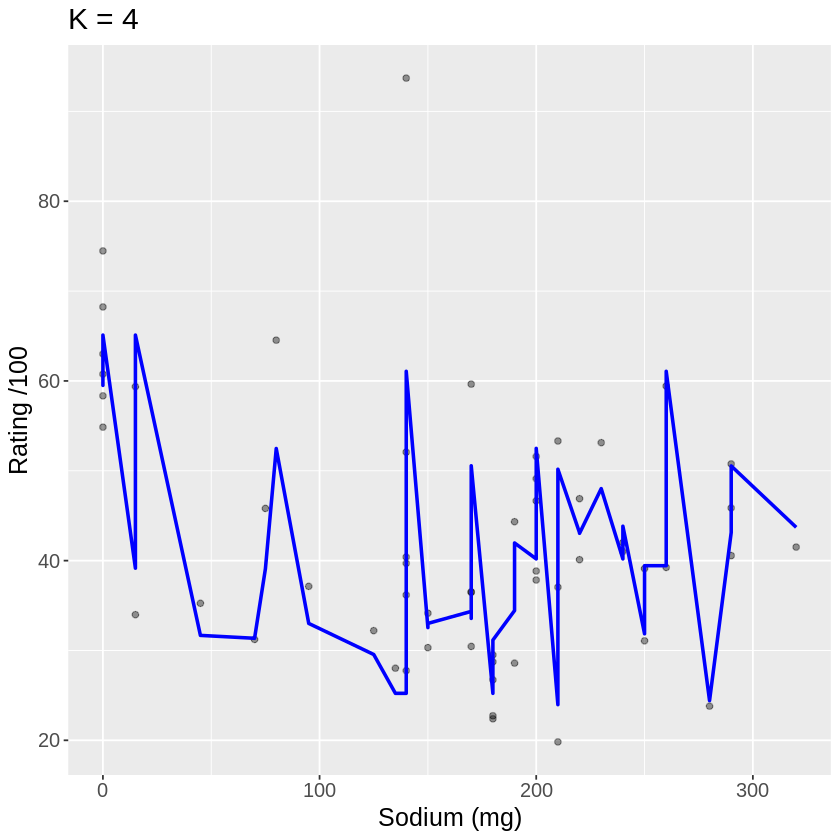

In [12]:
cereal_preds <- cereal_best_fit |>
    predict(cereal_training) |>
    bind_cols(cereal_training)

sodium_plot <- cereal_preds |>
    ggplot(aes(x = sodium, y = rating)) +
    geom_point(alpha = 0.4) +
    geom_line(data = cereal_preds,
            mapping = aes(x = sodium, y = .pred),
            color = "blue",
            linewidth = 1) +
    xlab("Sodium (mg)") +
    ylab("Rating /100") +
    ggtitle(paste0("K = ", cereal_k_val)) +
    theme(text = element_text(size = 15))

sodium_plot

predictions for wanted cereal samples

- Trix with marshmallows, https://www.shaws.com/shop/product-details.970024308.html#:~:text=Naturally%20and%20artificially%20fruit%20flavored,)%3B%2012%20g%20total%20sugars.
- 
Maple Cinnamon Cheerios Hearty Nut Medle, https://www.shaws.com/shop/product-details.970746010.html
- 
Honey Nut Cheerios Min, https://www.shaws.com/shop/product-details.970738424.html
- s
Lucky Charms Berry Sw, https://www.luckycharms.com/products/lucky-charms-berry-swirl-breakfast-cereal-with-marshmallows-kids-breakfast-cereal-made-with-whole-grain
- rl
Reese’s Puffs Peanut Butter Lov https://www.kroger.com/p/reese-s-puffs-peanut-butter-lovers-cereal/0001600021166
- and
Nature Valley French Vanilla Protein Gr (didn't include, barely a cereal)anola.

In [13]:
new_cereals <- tibble(name = c("Trix Marshmallows Cereal",
                              "Maple Cinnamon Cheerios Hearty Nut Medley",
                              "Honey Nut Cheerios Minis",
                              "Lucky Charms Berry Swirl",
                              "Reese's Puffs Peanut Butter Lovers"),
                      calories = c(150, 210, 140, 140, 160),
                      protein = c(2, 6, 3, 2, 3),
                      fat = c(1.5, 6, 2, 1.5, 4.5),
                      sodium = c(200, 210, 210, 210, 250),
                      fiber = c(2, 6, 3, 2, 2),
                      carbo = c(35, 39, 30, 31, 29),
                      sugars = c(12, 9, 12, 12, 12),
                      potass = c(0, 220, 150, 0, 100))

new_cereals

name,calories,protein,fat,sodium,fiber,carbo,sugars,potass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Trix Marshmallows Cereal,150,2,1.5,200,2,35,12,0
Maple Cinnamon Cheerios Hearty Nut Medley,210,6,6.0,210,6,39,9,220
Honey Nut Cheerios Minis,140,3,2.0,210,3,30,12,150
Lucky Charms Berry Swirl,140,2,1.5,210,2,31,12,0
Reese's Puffs Peanut Butter Lovers,160,3,4.5,250,2,29,12,100


In [14]:
new_cereals_preds <- cereal_best_fit |>
    predict(new_cereals) |>
    bind_cols(new_cereals)
new_cereals_preds

.pred,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
39.13783,Trix Marshmallows Cereal,150,2,1.5,200,2,35,12,0
34.65714,Maple Cinnamon Cheerios Hearty Nut Medley,210,6,6.0,210,6,39,9,220
34.49080,Honey Nut Cheerios Minis,140,3,2.0,210,3,30,12,150
38.41464,Lucky Charms Berry Swirl,140,2,1.5,210,2,31,12,0
34.65714,Reese's Puffs Peanut Butter Lovers,160,3,4.5,250,2,29,12,100
